[View in Colaboratory](https://colab.research.google.com/github/ditiansm2015/Smart_Joules_Energy_Conservation/blob/master/Hospital_Energy_Consumption.ipynb)

In [0]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

# Part A

In [154]:
df=pd.read_csv("https://raw.githubusercontent.com/ditiansm2015/Smart_Joules_Energy_Conservation/master/LaborRoom_EM.csv")
df.head()

,timestamp,KW,PF,KVA
0,01-05-2018 00:00,0.0,1.0,0.0
1,01-05-2018 00:01,0.0,1.0,0.0
2,01-05-2018 00:02,0.0,1.0,0.0
3,01-05-2018 00:03,0.0,1.0,0.0
4,01-05-2018 00:04,0.0,1.0,0.0


In [155]:
df['energy consumed']=(df["KW"]*60)/1000
df['label']="Labor Room"
df.head()

,timestamp,KW,PF,KVA,energy consumed,label
0,01-05-2018 00:00,0.0,1.0,0.0,0.0,Labor Room
1,01-05-2018 00:01,0.0,1.0,0.0,0.0,Labor Room
2,01-05-2018 00:02,0.0,1.0,0.0,0.0,Labor Room
3,01-05-2018 00:03,0.0,1.0,0.0,0.0,Labor Room
4,01-05-2018 00:04,0.0,1.0,0.0,0.0,Labor Room


In [156]:
df2=pd.read_csv("https://raw.githubusercontent.com/ditiansm2015/Smart_Joules_Energy_Conservation/master/Library_EnergyMeter.csv")
df2.head()

,timestamp,KW,PF,KVA
0,01-05-2018 00:00,0.0,1.0,0.0
1,01-05-2018 00:01,0.0,1.0,0.0
2,01-05-2018 00:02,0.0,1.0,0.0
3,01-05-2018 00:03,0.0,1.0,0.0
4,01-05-2018 00:04,0.0,1.0,0.0


In [157]:
df2['energy consumed']=(df2["KW"]*60)/1000
df2['label']="Library"
df2.head()

,timestamp,KW,PF,KVA,energy consumed,label
0,01-05-2018 00:00,0.0,1.0,0.0,0.0,Library
1,01-05-2018 00:01,0.0,1.0,0.0,0.0,Library
2,01-05-2018 00:02,0.0,1.0,0.0,0.0,Library
3,01-05-2018 00:03,0.0,1.0,0.0,0.0,Library
4,01-05-2018 00:04,0.0,1.0,0.0,0.0,Library


In [158]:
df3=pd.read_csv("https://raw.githubusercontent.com/ditiansm2015/Smart_Joules_Energy_Conservation/master/PHDU_Em.csv")
df3.head()

,timestamp,KW,PF,KVA
0,2018-05-01 00:00:32,0.0,1.0,0.0
1,2018-05-01 00:01:32,0.0,1.0,0.0
2,2018-05-01 00:02:32,0.0,1.0,0.0
3,2018-05-01 00:03:32,0.0,1.0,0.0
4,2018-05-01 00:04:34,0.0,1.0,0.0


In [159]:
df3['energy consumed']=(df3["KW"]*60)/1000
df3['label']="PHDU"
df3.head()

,timestamp,KW,PF,KVA,energy consumed,label
0,2018-05-01 00:00:32,0.0,1.0,0.0,0.0,PHDU
1,2018-05-01 00:01:32,0.0,1.0,0.0,0.0,PHDU
2,2018-05-01 00:02:32,0.0,1.0,0.0,0.0,PHDU
3,2018-05-01 00:03:32,0.0,1.0,0.0,0.0,PHDU
4,2018-05-01 00:04:34,0.0,1.0,0.0,0.0,PHDU


In [160]:
df4=pd.read_csv("https://raw.githubusercontent.com/ditiansm2015/Smart_Joules_Energy_Conservation/master/RFMold_EM.csv")
df4.head()

,timestamp,KW,PF,KVA
0,01-05-2018 00:00,0.0,1.0,0.0
1,01-05-2018 00:01,0.0,1.0,0.0
2,01-05-2018 00:02,0.0,1.0,0.0
3,01-05-2018 00:03,0.0,1.0,0.0
4,01-05-2018 00:04,0.0,1.0,0.0


In [161]:
df4['energy consumed']=(df4["KW"]*60)/1000
df4['label']="RFMold"
df4.head()

,timestamp,KW,PF,KVA,energy consumed,label
0,01-05-2018 00:00,0.0,1.0,0.0,0.0,RFMold
1,01-05-2018 00:01,0.0,1.0,0.0,0.0,RFMold
2,01-05-2018 00:02,0.0,1.0,0.0,0.0,RFMold
3,01-05-2018 00:03,0.0,1.0,0.0,0.0,RFMold
4,01-05-2018 00:04,0.0,1.0,0.0,0.0,RFMold


### combining all the classes into a single dataset

In [0]:
frames = [df, df2, df3,df4]
df_final = pd.concat(frames)

In [163]:
df_final.shape

(313391, 6)

In [0]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()

df_final['energy_consumed'] = label_encoder.fit_transform(df_final['energy consumed'])
df_final['label_encode'] = label_encoder.fit_transform(df_final['label'])
df_final['timestamp_encode'] = label_encoder.fit_transform(df_final['timestamp'])


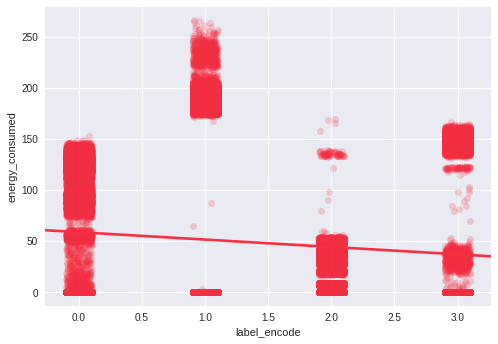

In [165]:
sns.regplot(x= 'label_encode',y='energy_consumed',data = df_final , x_jitter=0.1, scatter_kws={'alpha':0.2},color='#F72F41')

### Applying logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
reg = LogisticRegression()

In [168]:
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
predict_op=reg.predict(x_test)

In [170]:
score = reg.score(x_test, y_test)
print(score)

0.6070646046501734


In [0]:
# importing cross_val_score to perform cross validation
from sklearn.model_selection import cross_val_score

### Applying cross validation on Logistic Regression

In [172]:
scores = cross_val_score(reg, X,y, cv=50)
print(scores)

[0.615311   0.60940989 0.48484848 0.51212121 0.69138756 0.58165869
 0.47703349 0.43301435 0.58452951 0.58829159 0.65624502 0.59875558
 0.61901723 0.56238034 0.57705807 0.54195916 0.55169113 0.55695597
 0.61263561 0.66847479 0.58168475 0.7003829  0.69687301 0.62156988
 0.70532865 0.64087428 0.64390555 0.66379448 0.59629807 0.61496729
 0.56294878 0.64640179 0.6280517  0.51858944 0.61480772 0.56151269
 0.66411361 0.63794479 0.67879368 0.60762725 0.58082017 0.60986118
 0.65581618 0.6355513  0.69135014 0.72247048 0.69869135 0.66804979
 0.6418768  0.60437281]
